In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#first let's query for the raw html 

import urllib.request
values = {'Name' : 'Her X-1',
          'OUT': 'web',
          'DB': 'photcat',
          'SHORT': 'long'
         }
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getcssconedbid_release2.cgi"
data = urllib.parse.urlencode(values)
data = data.encode('ascii') # data should be bytes
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:
   the_page = response.read()

In [3]:
# now let's the the html into a useable array format
text = str(the_page)
table_lines = text.split('Photometry of Objs')[-1].split('\\n')[1:-3]
table = np.array([t.replace('/','').replace('<tr>','').split('<td>')[1:] for t in table_lines],dtype=np.float64)

In [4]:
# unpack the table's columns
ids, magnitude, magerr, RA, dec, MJD = table.T
np.savetxt("herx1.dat", np.c_[MJD, magnitude])

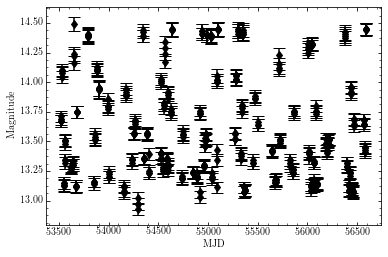

In [5]:
# do a plot of magnitude over time
plt.errorbar(MJD, magnitude, magerr,ls='', marker='d',color='black')
plt.xlabel("MJD")
plt.ylabel("Magnitude")
plt.savefig("MJF_v_Magnitude.pdf",bbox_inches='tight')

In [7]:
# request the VOTable

import urllib.request
values = {'Name' : 'Her X-1',
          'OUT': 'vot',
          'DB': 'photcat',
          'SHORT': 'long'
         }
url = "http://nesssi.cacr.caltech.edu/cgi-bin/getcssconedbid_release2.cgi"
data = urllib.parse.urlencode(values)
data = data.encode('ascii') # data should be bytes
req = urllib.request.Request(url, data)
with urllib.request.urlopen(req) as response:
   the_page = response.read()
the_page = str(the_page)
# download the .vot
the_url = "http://" + the_page.split("download")[0].replace(">","").split("http://")[-1]

local_filename, headers = urllib.request.urlretrieve(the_url, filename="data.vot")
html = open(local_filename)
html.close()

In [77]:
#read the votable and plot the data
from astropy.io.votable import parse
votable = parse("data.vot", pedantic=False)

x = None
for resource in votable.resources:
    for table in resource.tables:
    # ... do something with the table ...
        x = table
        pass
print(x.fields)

[<FIELD ID="MasterID" arraysize="*" datatype="char" name="ID" ucd="meta.id"/>, <FIELD ID="DetectionID" arraysize="*" datatype="char" name="DetectionID" ucd="meta.id"/>, <FIELD ID="RAJ2000" datatype="float" name="RAJ2000" precision="5" ucd="pos.eq.ra;meta.main" unit="deg" utype="stc:AstroCoords.Position2D.Value2.C1"/>, <FIELD ID="DEJ2000" datatype="float" name="DEJ2000" precision="5" ucd="pos.eq.dec;meta.main" unit="deg" utype="stc:AstroCoords.Position2D.Value2.C2"/>, <FIELD ID="ObsTime" arraysize="1" datatype="float" name="ObsTime" ucd="time.epoch" unit="d"/>, <FIELD ID="Mag" arraysize="1" datatype="float" name="Mag" ucd="phot.mag"/>, <FIELD ID="Magerr" arraysize="1" datatype="float" name="Magerr" ucd="stat.error;phot.mag"/>, <FIELD ID="Airmass" arraysize="1" datatype="float" name="Airmass" ucd="obs.airMass"/>, <FIELD ID="ExpTime" datatype="float" name="ExpTime" precision="1" ucd="time.duration;obs.exposure" unit="s" width="6"/>, <FIELD ID="CCD_X_position" arraysize="1" datatype="float

In [78]:
MJD, mag, magerr = np.array(x.array["ObsTime"]).T[0], np.array(x.array["Mag"]).T[0], np.array(x.array["Magerr"]).T[0]
plt.errorbar(MJD, mag, magerr,ls='', marker='d',color='black')
plt.xlabel("MJD")
plt.ylabel("Magnitude")
plt.savefig("MJF_v_Magnitude.pdf",bbox_inches='tight')

In [1]:
open("data.vot",'r').read()

'<?xml version="1.0"?>\n<VOTABLE version="1.2" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:stc="http://www.ivoa.net/xml/STC/stc-v1.30.xsd" xmlns="http://www.ivoa.net/xml/VOTable/v1.2">\n<RESOURCE name="CRTS lightcurves">\n<TABLE name="query results">\n<DESCRIPTION>Photometry data from CRTS</DESCRIPTION>\n     <FIELD name="ID" datatype="char" ucd="meta.id" arraysize="*" ID="MasterID"/>\n     <FIELD name="DetectionID" datatype="char" ucd="meta.id" arraysize="*" ID="DetectionID"/>\n     <FIELD name="RAJ2000" ucd="pos.eq.ra;meta.main"     ID="RAJ2000" utype="stc:AstroCoords.Position2D.Value2.C1"     datatype="float" precision="5" unit="deg" />\n     <FIELD name="DEJ2000" ucd="pos.eq.dec;meta.main"     ID="DEJ2000" utype="stc:AstroCoords.Position2D.Value2.C2"     datatype="float" precision="5" unit="deg" />\n     <FIELD name="ObsTime" ucd="time.epoch" datatype="float"     arraysize="1" unit="d" ID="ObsTime" />\n     <FIELD name="Mag" ucd="phot.mag" datatype="float"     array

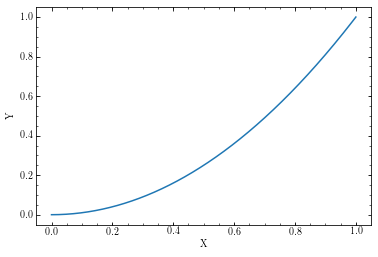

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,1000)
y = x**2

plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
